In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, Flatten, Concatenate
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import KFold

In [ ]:
df=pd.read_csv('/kaggle/input/cleanfile/final_Cleaned_details3.csv',parse_dates=True)

In [36]:
df.head()

,Unnamed: 0,timestamp,rank,asin,year,month,date,day,hour,genre,Title,Author,Group,Format,publisher
0,0,27-04-2018 07:00,60585.0,B07CPN5KN7,2018,4,27,Friday,7,Mystery,Now's She's Gone: An absolutely gripping crime...,Alison James,kindle,kindle edition,Bookouture
1,1,27-04-2018 09:00,67721.0,B07CPN5KN7,2018,4,27,Friday,9,Mystery,Now's She's Gone: An absolutely gripping crime...,Alison James,kindle,kindle edition,Bookouture
2,2,27-04-2018 10:00,72026.0,B07CPN5KN7,2018,4,27,Friday,10,Mystery,Now's She's Gone: An absolutely gripping crime...,Alison James,kindle,kindle edition,Bookouture
3,3,27-04-2018 11:00,78342.0,B07CPN5KN7,2018,4,27,Friday,11,Mystery,Now's She's Gone: An absolutely gripping crime...,Alison James,kindle,kindle edition,Bookouture
4,4,27-04-2018 13:00,82636.0,B07CPN5KN7,2018,4,27,Friday,13,Mystery,Now's She's Gone: An absolutely gripping crime...,Alison James,kindle,kindle edition,Bookouture


In [59]:
df.shape

(262723, 15)

In [38]:
# Check unique count in each column
unique_counts = df.nunique()

# Display the result
print(unique_counts)


Unnamed: 0    262723
timestamp       1391
rank          103904
asin             267
year               1
month              3
date              31
day                7
hour              24
genre             16
Title            266
Author           245
Group              1
Format             1
publisher        177
dtype: int64


In [39]:
# Reordering columns to move 'rank' to the last position
df = df[[col for col in df.columns if col != 'rank'] + ['rank']]

# Verify the column order
print(df.columns)

Index(['Unnamed: 0', 'timestamp', 'asin', 'year', 'month', 'date', 'day',
       'hour', 'genre', 'Title', 'Author', 'Group', 'Format', 'publisher',
       'rank'],
      dtype='object')


In [40]:
# Total null values in the dataset
total_nulls = df.isnull().sum().sum()

print(f"Total null values in the dataset: {total_nulls}")


Total null values in the dataset: 0


In [42]:
#new dataframe form
df_new = df.drop(columns=['Title','asin', 'year','timestamp'])

# Verify the columns have been removed
print(df2.columns)

Index(['Unnamed: 0', 'month', 'date', 'day', 'hour', 'genre', 'Author',
       'Group', 'Format', 'publisher', 'rank'],
      dtype='object')


In [43]:
df_new.shape

(262723, 11)

In [44]:
df_new.head()

,Unnamed: 0,month,date,day,hour,genre,Author,Group,Format,publisher,rank
0,0,4,27,Friday,7,Mystery,Alison James,kindle,kindle edition,Bookouture,60585.0
1,1,4,27,Friday,9,Mystery,Alison James,kindle,kindle edition,Bookouture,67721.0
2,2,4,27,Friday,10,Mystery,Alison James,kindle,kindle edition,Bookouture,72026.0
3,3,4,27,Friday,11,Mystery,Alison James,kindle,kindle edition,Bookouture,78342.0
4,4,4,27,Friday,13,Mystery,Alison James,kindle,kindle edition,Bookouture,82636.0


In [46]:
df_new.head()

,month,date,day,hour,genre,Author,Group,Format,publisher,rank
0,4,27,Friday,7,Mystery,Alison James,kindle,kindle edition,Bookouture,60585.0
1,4,27,Friday,9,Mystery,Alison James,kindle,kindle edition,Bookouture,67721.0
2,4,27,Friday,10,Mystery,Alison James,kindle,kindle edition,Bookouture,72026.0
3,4,27,Friday,11,Mystery,Alison James,kindle,kindle edition,Bookouture,78342.0
4,4,27,Friday,13,Mystery,Alison James,kindle,kindle edition,Bookouture,82636.0


In [47]:
df_new.shape

(262723, 10)

In [48]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262723 entries, 0 to 262722
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   month      262723 non-null  int64  
 1   date       262723 non-null  int64  
 2   day        262723 non-null  object 
 3   hour       262723 non-null  int64  
 4   genre      262723 non-null  object 
 5   Author     262723 non-null  object 
 6   Group      262723 non-null  object 
 7   Format     262723 non-null  object 
 8   publisher  262723 non-null  object 
 9   rank       262723 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 20.0+ MB


In [49]:
# Check unique count in each column
unique_counts = df_new.nunique()

# Display the result
print(unique_counts)


month             3
date             31
day               7
hour             24
genre            16
Author          245
Group             1
Format            1
publisher       177
rank         103904
dtype: int64


Computed Column

In [ ]:
# ---- Step 3: Apply Cyclic Encoding ----
day_mapping = {"Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, 
               "Friday": 4, "Saturday": 5, "Sunday": 6}
df_new["day_num"] = df_new["day"].map(day_mapping)

In [ ]:
# Save day mapping
with open("day_mapping_lstm.pkl", "wb") as f:
    pickle.dump(day_mapping, f)

print("Day mapping saved successfully!")

In [ ]:
# Ensure DataFrame is sorted chronologically
df_new = df_new.sort_values(by=["month", "date","day"]).reset_index(drop=True)

In [ ]:
df_new.shape

(262723, 8)

In [ ]:
# Apply Cyclic Encoding
df_new["month_sin"] = np.sin(2 * np.pi * df_new["month"] / 12)
df_new["month_cos"] = np.cos(2 * np.pi * df_new["month"] / 12)
df_new["date_sin"] = np.sin(2 * np.pi * df_new["date"] / 31)
df_new["date_cos"] = np.cos(2 * np.pi * df_new["date"] / 31)
df_new["day_sin"] = np.sin(2 * np.pi * df_new["day_num"] / 7)
df_new["day_cos"] = np.cos(2 * np.pi * df_new["day_num"] / 7)

# Drop original columns
df_new.drop(columns=["month", "date", "day", "day_num"], inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_new.head()

(262723, 34)

# FEATURE ENGINEERING

In [ ]:
# ---- Step 1: Label Encode 'genre', 'Group', 'Format' ----
# Dictionary to store encoding mappings
label_encodings = {}

# Function to perform label encoding and store mapping
def label_encode_column(df, column):
    le = LabelEncoder()
    df[f"{column}_encoded"] = le.fit_transform(df[column])
    
    # Store mapping
    label_encodings[column] = {label: int(code) for label, code in zip(le.classes_, le.transform(le.classes_))}
    
    return df

# Apply label encoding to multiple columns
columns_to_encode = ["genre", "Group", "Format"]
for col in columns_to_encode:
    df_new = label_encode_column(df_new, col)

# Save all mappings in one pickle file
with open("label_encodings_lstm.pkl", "wb") as f:
    pickle.dump(label_encodings, f)

# Drop original categorical columns
df_new.drop(columns=columns_to_encode, inplace=True)

print("Label encoding completed and saved in 'label_encodings.pkl'!")


In [ ]:
### Step 3: K-Fold Target Encoding for 'Author' and 'publisher'
# import pickle
# import numpy as np
# from sklearn.model_selection import KFold

def kfold_target_encoding(train_df, column, target, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    global_mean = train_df[target].mean()
    
    # Create a new column for encoded values
    train_df[f"{column}_encoded"] = np.nan

    encoding_map = {}

    for train_idx, val_idx in kf.split(train_df):
        train_fold, val_fold = train_df.iloc[train_idx], train_df.iloc[val_idx]
        fold_means = train_fold.groupby(column)[target].mean()

        # Store mapping
        encoding_map.update(fold_means.to_dict())

        train_df.loc[val_idx, f"{column}_encoded"] = train_df[column].map(fold_means)

    # Fill NaN with global mean
    train_df[f"{column}_encoded"].fillna(global_mean, inplace=True)

    # Drop original column
    train_df.drop(columns=[column], inplace=True)

    return train_df, encoding_map

# Apply encoding and store mappings
author_encoded_df, author_map = kfold_target_encoding(df_new, "Author", "rank")
publisher_encoded_df, publisher_map = kfold_target_encoding(author_encoded_df, "publisher", "rank")

# Combine mappings
encoding_dict = {
    "Author": author_map,
    "Publisher": publisher_map
}

# Save all encodings to a single file
with open("targetencoding.pkl", "wb") as f:
    pickle.dump(encoding_dict, f)

print("Saved target encoding mapping in 'targetencoding.pkl'")

In [ ]:
# Preserve Title before dropping it
df_new["original_title"] = df_new["Title"]

In [ ]:
df_new.head()

,month,date,day,hour,genre,Author,publisher,rank
0,4,0.866667,Friday,0.304348,9,12,22,0.012333
1,4,0.866667,Friday,0.391304,9,12,22,0.013786
2,4,0.866667,Friday,0.434783,9,12,22,0.014663
3,4,0.866667,Friday,0.478261,9,12,22,0.015949
4,4,0.866667,Friday,0.565217,9,12,22,0.016823


In [ ]:
# import pickle
# from sklearn.preprocessing import LabelEncoder
# label encoding and embedding for title

# Initialize label encoder
title_le = LabelEncoder()
df_new["title_encoded"] = title_le.fit_transform(df_new["Title"])

# Store the mapping
title_encoding = {label: int(code) for label, code in zip(title_le.classes_, title_le.transform(title_le.classes_))}

# Save the title encoding mapping
with open("title_encoding.pkl", "wb") as f:
    pickle.dump(title_encoding, f)

# Drop original 'Title' column
df_new.drop(columns=["Title"], inplace=True)

print("Title encoding completed and saved in 'title_encoding.pkl'!")


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Step 4: Normalize All Features
scaler = MinMaxScaler()
# Identify all feature columns except 'rank', 'title_encoded' (used for embeddings), and 'original_title'
feature_columns = [col for col in df_new.columns if col not in ["rank", "title_encoded", "original_title"]]

# Normalize all feature columns
df_new[feature_columns] = pd.DataFrame(scaler.fit_transform(df_new[feature_columns]), columns=feature_columns)

In [ ]:
df_new.head()

In [ ]:
print("Available columns in df:", df.columns)

In [ ]:
feature_columns = [col for col in df.columns if col not in ["rank", "original_title", "title_encoded"]]

# Ensure the expected feature columns exist
missing_columns = set(feature_columns) - set(df.columns)
if missing_columns:
    print(f"Warning: The following columns are missing and won't be used: {missing_columns}")

In [ ]:
print("Final feature columns for sequences:", feature_columns)


In [ ]:
# Define sequence length
sequence_length = 10  

X_numeric_seq, X_categorical_seq, y_sequences = [], [], []


for i in range(len(df) - sequence_length):
    X_numeric_seq.append(X_numeric[i:i+sequence_length])  # Numeric time-series features
    X_categorical_seq.append(X_categorical[i:i+sequence_length])  # Encoded categorical features
    y_sequences.append(y[i + sequence_length])  # Target value

X_numeric_seq = np.array(X_numeric_seq)
X_categorical_seq = np.array(X_categorical_seq)
y_sequences = np.array(y_sequences)
print(f"Shapes -> X_numeric_seq: {X_numeric_seq.shape}, X_categorical_seq: {X_categorical_seq.shape}, y_sequences: {y_sequences.shape}")


In [130]:
print("numeric",X_numeric_seq)
print("encoded",X_categorical_seq )
print("target",y_sequences)

numeric [[[0.86666667 0.30434783 4.        ]
  [0.86666667 0.39130435 4.        ]
  [0.86666667 0.43478261 4.        ]
  ...
  [0.86666667 0.73913043 4.        ]
  [0.86666667 0.82608696 4.        ]
  [0.86666667 0.86956522 4.        ]]

 [[0.86666667 0.39130435 4.        ]
  [0.86666667 0.43478261 4.        ]
  [0.86666667 0.47826087 4.        ]
  ...
  [0.86666667 0.82608696 4.        ]
  [0.86666667 0.86956522 4.        ]
  [0.86666667 0.95652174 4.        ]]

 [[0.86666667 0.43478261 4.        ]
  [0.86666667 0.47826087 4.        ]
  [0.86666667 0.56521739 4.        ]
  ...
  [0.86666667 0.86956522 4.        ]
  [0.86666667 0.95652174 4.        ]
  [0.86666667 1.         4.        ]]

 ...

 [[0.96666667 0.13043478 6.        ]
  [0.96666667 0.13043478 6.        ]
  [0.96666667 0.13043478 6.        ]
  ...
  [0.96666667 0.13043478 6.        ]
  [0.96666667 0.13043478 6.        ]
  [0.96666667 0.13043478 6.        ]]

 [[0.96666667 0.13043478 6.        ]
  [0.96666667 0.13043478 6.  

In [ ]:
# Splitting Data
split = int(0.8 * len(df_new))
train_df, test_df = df_new.iloc[:split].copy(), df_new.iloc[split:].copy()

# Extract features and target
X_train_num = train_df[feature_columns].values.reshape(-1, 1, len(feature_columns))
X_test_num = test_df[feature_columns].values.reshape(-1, 1, len(feature_columns))
X_train_title = train_df["title_encoded"].values.reshape(-1, 1)
X_test_title = test_df["title_encoded"].values.reshape(-1, 1)
y_train = train_df["rank"].values
y_test = test_df["rank"].values

# Ensure Title is available in test_df
test_df["Title"] = test_df["original_title"]
test_df.drop(columns=["original_title"], inplace=True)

print(X_train_num.shape,X_test_num.shape,y_train.shape,y_test.shape)

Train shape: (210170, 10, 3), Test shape: (52543, 10, 3)
Categorical Train shape: (210170, 10, 3), Categorical Test shape: (52543, 10, 3)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Embedding, Flatten, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define LSTM Model
num_input = Input(shape=(1, len(feature_columns)), name="numerical_input")
title_input = Input(shape=(1,), name="title_input")

# Title Embedding
title_vocab_size = df_new["title_encoded"].nunique() + 1
embedding_dim = 128
title_embedding = Embedding(input_dim=title_vocab_size, output_dim=embedding_dim)(title_input)
title_embedding = Flatten()(title_embedding)
title_embedding = Dense(64, activation="relu")(title_embedding)

# LSTM for numerical features
num_lstm = LSTM(64, return_sequences=False)(num_input)

# Merge LSTM output and title embedding
merged = Concatenate()([num_lstm, title_embedding])


# Fully Connected Layers
x = Dense(512, activation='relu')(merged)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='linear')(x)

# Build & Compile Model
model = Model(inputs=[num_input, title_input], outputs=output)
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ categorical_input         │ (None, 10, 3)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_3 (GetItem)      │ (None, 10)             │              0 │ categorical_input[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_4 (GetItem)      │ (None, 10)             │              0 │ categorical_input[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_5 (GetItem)      │ (None, 10)             │              0 │ categorical_input[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 10, 8)          │            136 │ get_item_3[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 10, 16)         │          3,936 │ get_item_4[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, 10, 12)         │          2,136 │ get_item_5[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ numerical_input           │ (None, 10, 3)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 10, 36)         │              0 │ embedding_3[0][0],     │
│ (Concatenate)             │                        │                │ embedding_4[0][0],     │
│                           │                        │                │ embedding_5[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_7 (LSTM)             │ (None, 64)             │         17,408 │ numerical_input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_6 (LSTM)             │ (None, 32)             │          8,832 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 96)             │              0 │ lstm_7[0][0],          │
│ (Concatenate)             │                        │                │ lstm_6[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 32)             │          3,104 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32)             │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │             33 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 35,585 (139.00 KB)

 Trainable params: 35,585 (139.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Train Model
model.fit([X_train_num, X_train_title], y_train, epochs=20, batch_size=256, validation_data=([X_test_num, X_test_title], y_test))

Epoch 1/20
3284/3284 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 0.0110 - mae: 0.0704 - val_loss: 0.0104 - val_mae: 0.0676
Epoch 2/20
3284/3284 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0104 - mae: 0.0689 - val_loss: 0.0104 - val_mae: 0.0672
Epoch 3/20
3284/3284 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0104 - mae: 0.0684 - val_loss: 0.0101 - val_mae: 0.0681
Epoch 4/20
3284/3284 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0101 - mae: 0.0677 - val_loss: 0.0098 - val_mae: 0.0683
Epoch 5/20
3284/3284 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0097 - mae: 0.0662 - val_loss: 0.0093 - val_mae: 0.0649
Epoch 6/20
3284/3284 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0092 - mae: 0.0647 - val_loss: 0.0090 - val_mae: 0.0637
Epoch 7/20
3284/3284 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0087 - mae: 0.0632 - val_loss: 0.0087 - val_mae: 0.0629
Epoch 8/20
3284/3284 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0085 - mae: 0.0619 - val_loss: 0.0084 - val_mae: 0.0617
Epoch 9/20
3284/3284 ━━━━━━━━━━━

In [ ]:
print(f"X_test shape: {X_test_num.shape}")
print(f"y_test shape: {y_test.shape}")

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict ranks using the trained LSTM model
predicted_ranks = model.predict([X_test_num, X_test_title]).flatten()  # Ensure correct shape

# Create a DataFrame with actual and predicted ranks
df_results = pd.DataFrame({
    "title": test_df["Title"],  # Aligning with sequence length
    "actual_rank": y_test.flatten(),
    "predicted_rank": predicted_ranks.flatten()
})

# Keep only unique books (first occurrence in test data)
df_unique_books = df_results.drop_duplicates(subset=["title"])

# Print unique book ranks
print(df_unique_books[["title", "actual_rank", "predicted_rank"]])

# Optional: Evaluate model performance
mae = mean_absolute_error(y_test, predicted_ranks)
mse = mean_squared_error(y_test, predicted_ranks)
r2 = r2_score(y_test, predicted_ranks)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R² Score: {r2:.4f}")

1642/1642 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0070 - mae: 0.0568
Test Loss: 0.006954113952815533, Test MAE: 0.056636709719896317


In [ ]:
# Evaluate Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, predicted_ranks)
mse = mean_squared_error(y_test, predicted_ranks)
r2 = r2_score(y_test, predicted_ranks)

# Convert to percentage
mae_pct = (mae / max(y_test)) * 100  # MAE as a percentage of max actual value
mse_pct = (mse / (max(y_test) ** 2)) * 100  # MSE as a percentage of squared max actual value
r2_pct = r2 * 100  # R² is already a ratio, convert to percentage

# Print results
print(f"MAE: {mae:.2f} ({mae_pct:.2f}%)")
print(f"MSE: {mse:.2f} ({mse_pct:.2f}%)")
print(f"R² Score: {r2:.2f} ({r2_pct:.2f}%)")

In [ ]:
# Predict Ranks for All Titles
predicted_ranks = model.predict([X_test_num, X_test_title])

1642/1642 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [ ]:
# 🔍 Debugging: Check Shapes Before Creating DataFrame
print(f"Predicted Rank Shape: {predicted_ranks.shape}")
print(f"Title Shape: {test_df['Title'].shape}")

# Ensure Predicted Rank is 1D before creating DataFrame
results_df = pd.DataFrame({
    'Title': test_df['Title'].values,  # Extract titles from the test set
    'Predicted Rank': predicted_ranks.flatten()
})

In [141]:
# Ensure correct reshaping before inverse transform
y_test_original = scaler_target.inverse_transform(y_test.reshape(-1, 1))
predictions_original = scaler_target.inverse_transform(predictions.reshape(-1, 1))


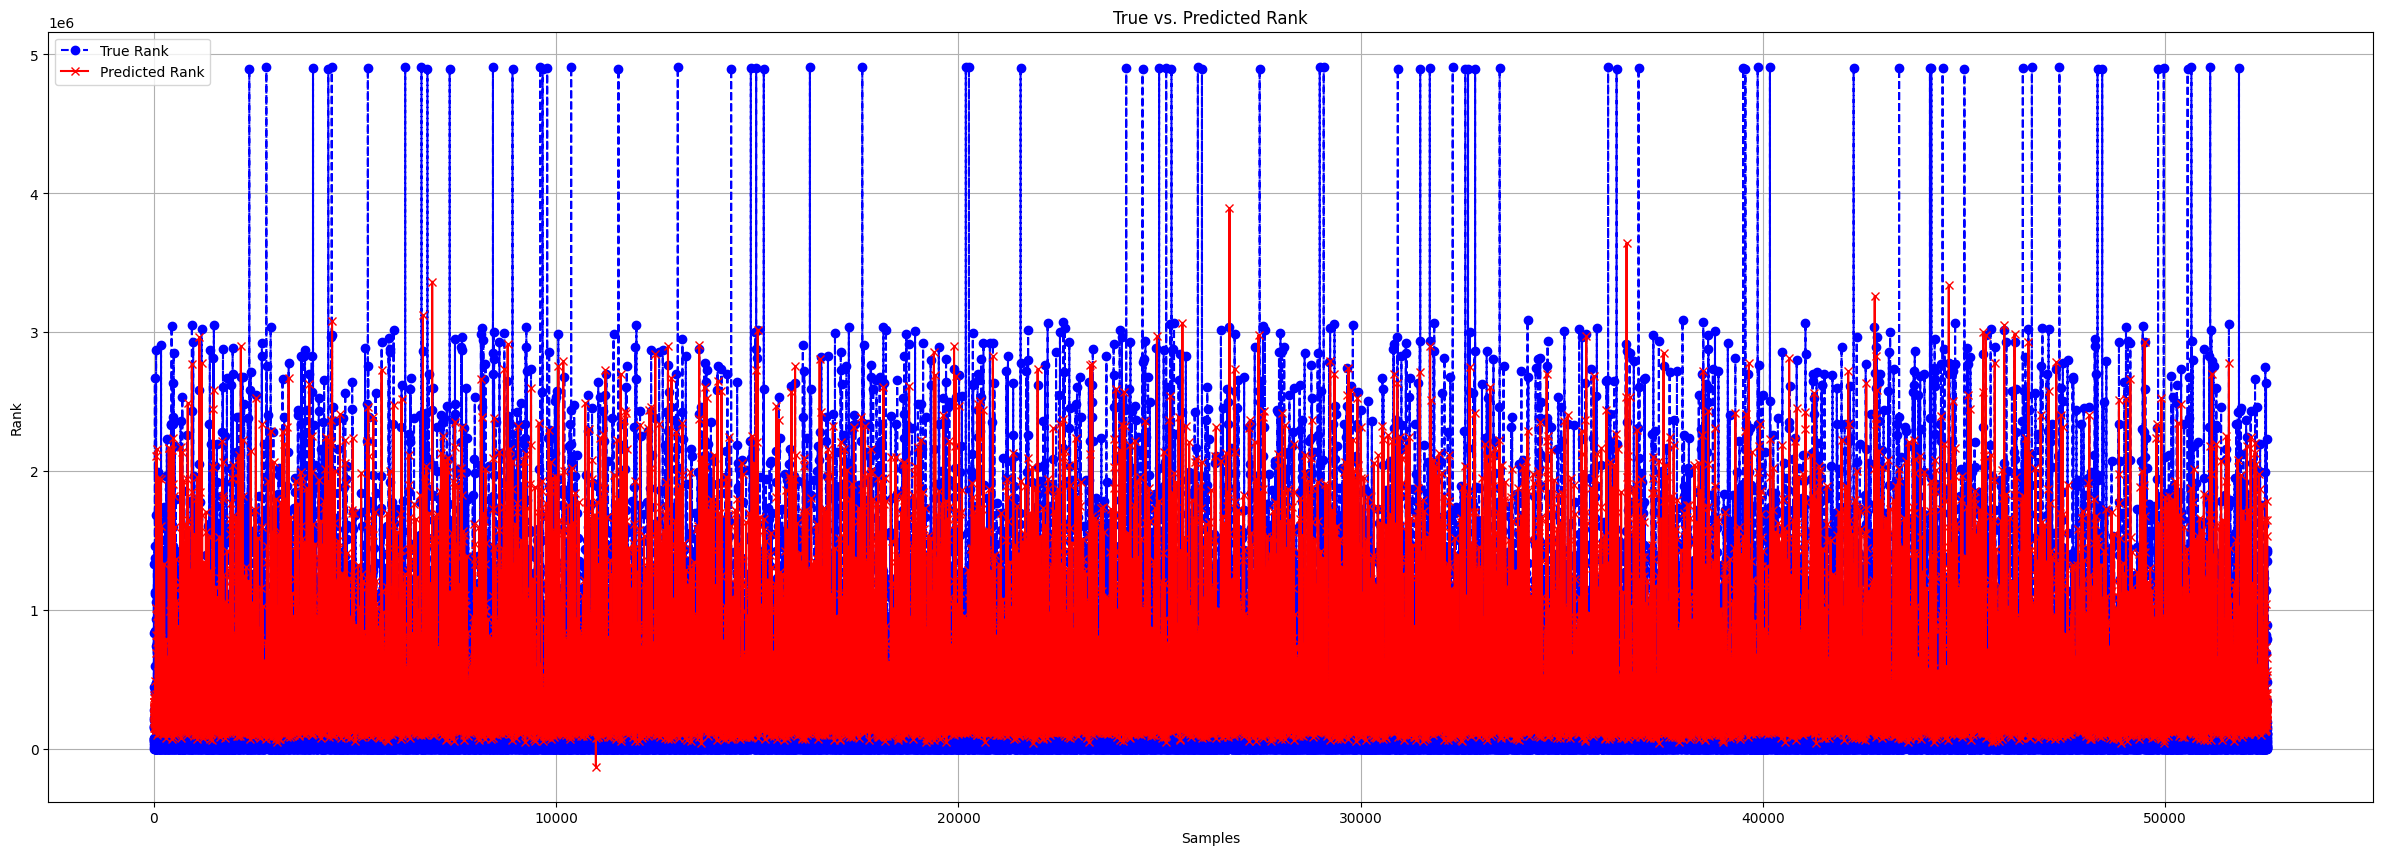

In [142]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(30, 10))
plt.plot(y_test_original, label='True Rank', color='blue', linestyle='dashed', marker='o')
plt.plot(predictions_original, label='Predicted Rank', color='red', linestyle='solid', marker='x')

plt.xlabel('Samples')
plt.ylabel('Rank')
plt.title('True vs. Predicted Rank')
plt.legend()
plt.grid()
plt.show()


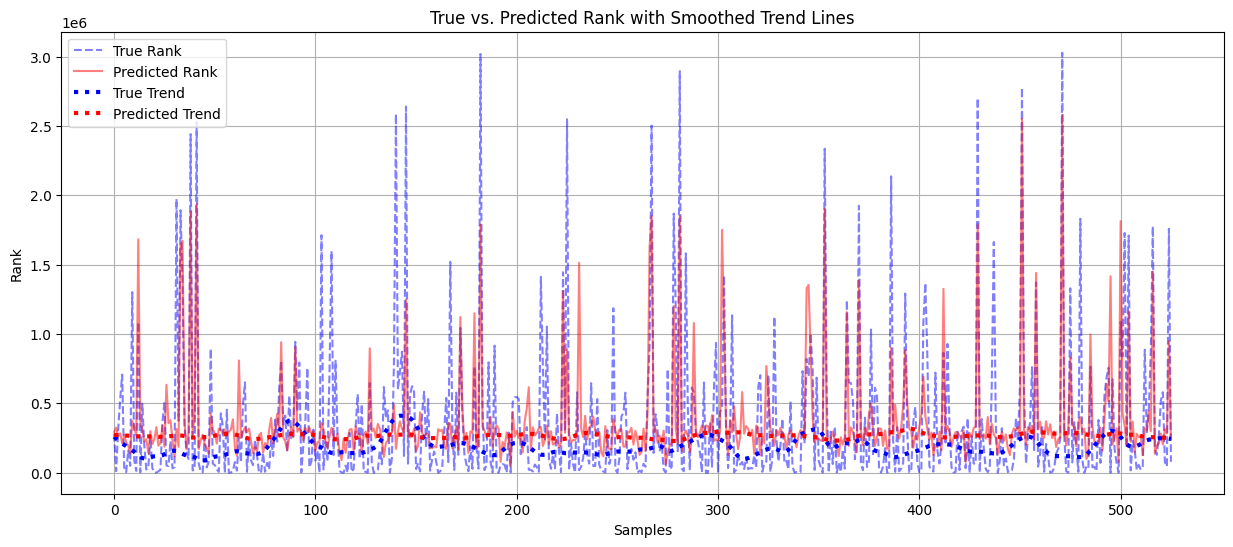

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# Subset every 100th point to reduce density (adjust as needed)
sample_rate = 100
y_test_sampled = y_test_original[::sample_rate]
predictions_sampled = predictions_original[::sample_rate]
x_sampled = np.arange(len(y_test_sampled))

# Compute LOWESS trend line
true_trend = lowess(y_test_sampled.flatten(), x_sampled, frac=0.05)
pred_trend = lowess(predictions_sampled.flatten(), x_sampled, frac=0.05)

# Plot actual vs predicted
plt.figure(figsize=(15, 6))
plt.plot(y_test_sampled, label='True Rank', color='blue', linestyle='dashed', alpha=0.5)
plt.plot(predictions_sampled, label='Predicted Rank', color='red', linestyle='solid', alpha=0.5)

# Add smoothed trend lines
plt.plot(true_trend[:, 0], true_trend[:, 1], color='blue', linewidth=3, label='True Trend', linestyle='dotted')
plt.plot(pred_trend[:, 0], pred_trend[:, 1], color='red', linewidth=3, label='Predicted Trend', linestyle='dotted')

plt.xlabel('Samples')
plt.ylabel('Rank')
plt.title('True vs. Predicted Rank with Smoothed Trend Lines')
plt.legend()
plt.grid()
plt.show()


analysis

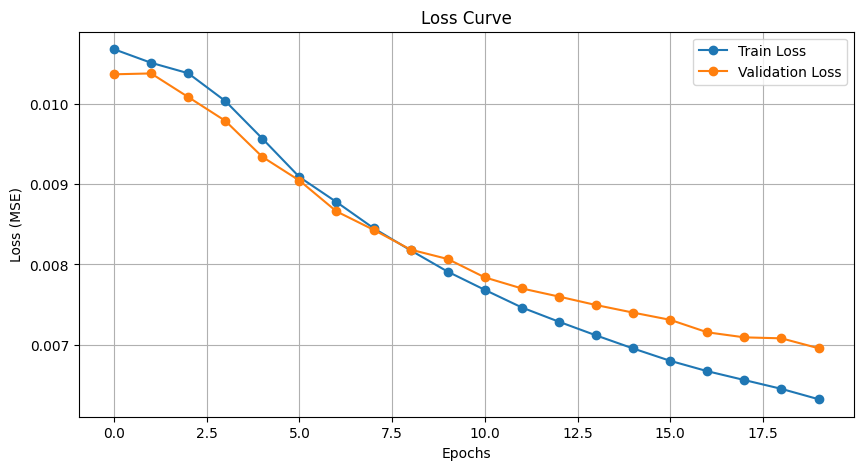

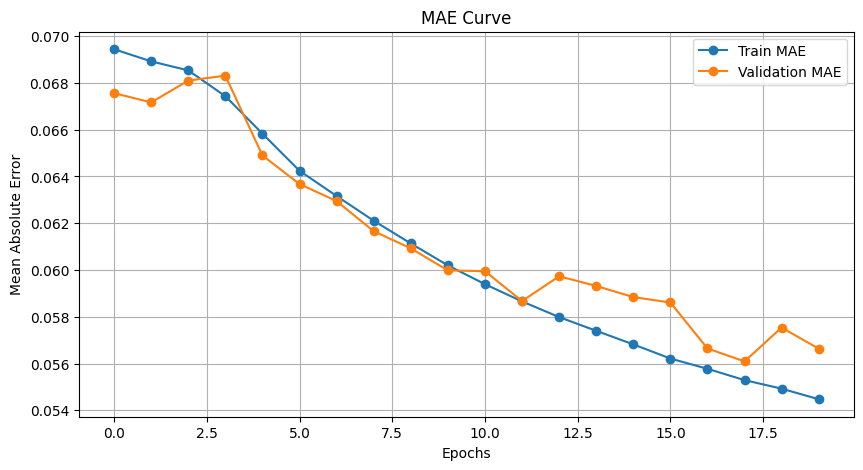

In [ ]:
import matplotlib.pyplot as plt

# Plot Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve')
plt.legend()
plt.grid()
plt.show()

# Plot MAE Curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE', marker='o')
plt.plot(history.history['val_mae'], label='Validation MAE', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('MAE Curve')
plt.legend()
plt.grid()
plt.show()

saving model

In [140]:
import pickle

# Save the trained LSTM model
model.save("lstm_model.h5")  # HDF5 format for Keras models

# Save the OneHotEncoder, LabelEncoders, and Scaler
with open("ohe_encoder.pkl", "wb") as f:
    pickle.dump(ohe, f)

with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)  # Dictionary of label encoders

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)  # StandardScaler for numerical features
